## Case Study on Probability for Data Science

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [2]:
df = pd.read_csv(r"D:\activity\mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


### Findings:

1. The data set have 8124 entries with 23 columns.
2. All the features are object datatype.
3. Class column is the target column, having 2 unique values e: edible, p:poisonous
4. There is no null values with in the given dataset.

In [5]:
# As the entire data set is object type, we want to convert them to numerical by performing encoding.

#label encoding target column 'class'
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
# Splitting the dataset into features and target set.

x = df.drop(['class'],axis=1) #features
y = df['class'] #target

In [7]:
# Performing one hot encoding in fetures.

x = pd.get_dummies(x)

In [8]:
# Splitting the data set into training and testin test.

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.3)

## Model1 - k-NN

In [9]:
acc = []
for i in (np.arange(3,15)):
    classifier = KNeighborsClassifier(n_neighbors=i, metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred = classifier.predict(x_test)
    acc_score = accuracy_score(y_test,y_pred)
    acc.append(acc_score)
    

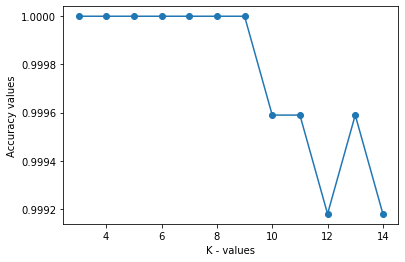

In [11]:
plt.plot(np.arange(3,15), acc, 'o-')
plt.xlabel('K - values')
plt.ylabel('Accuracy values')
plt.show() 

In [12]:
# We can take k-value 4 which also shows high accuracy

classifier = KNeighborsClassifier(n_neighbors=4, metric='minkowski')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [14]:
acc_knn = accuracy_score(y_test,y_pred)

In [15]:
models = []
models.append(['k-NN Classifier',acc_knn])

## Model 2 - Logistic Regression

In [16]:
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred = model_lr.predict(x_test)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [18]:
acc_lr = accuracy_score(y_test,y_pred)

In [19]:
models.append(['Logisitic Regression Classifier',acc_lr])

## Model 3 - Decision Tree

In [20]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred = model_dt.predict(x_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [22]:
acc_dt = accuracy_score(y_test,y_pred)

In [23]:
models.append(['Decision Tree Classifier',acc_dt])

## Model 4 - Random Forest

In [24]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [26]:
acc_rf = accuracy_score(y_test,y_pred)

models.append(['Random Forest Classifier',acc_rf])

## Model 5 - Gradient Boosting

In [27]:
model_gb = GradientBoostingClassifier()
model_gb.fit(x_train,y_train)
y_pred = model_gb.predict(x_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



In [29]:
acc_gb = accuracy_score(y_test,y_pred)

models.append(['Gradient Boosting Classifier',acc_gb])

## Model 6 - Naive Bayes' Gaussian Classifier

In [30]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred = gnb.predict(x_test)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      1257
           1       0.93      1.00      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.97      0.97      0.96      2438
weighted avg       0.97      0.96      0.96      2438



In [32]:
acc_gnb = accuracy_score(y_test,y_pred)

models.append(['Naive Bayes Gaussian Classifier',acc_gnb])

## Model 7 - Naive Bayes' Bernoulli Classfier

In [33]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred = bnb.predict(x_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1257
           1       0.98      0.88      0.93      1181

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg       0.94      0.93      0.93      2438



In [35]:
acc_bnb = accuracy_score(y_test,y_pred)

models.append(['Naive Bayes Bernoulli Classifier',acc_bnb])

In [36]:
mod = pd.DataFrame(models, columns = ['Models','Accuracy Score'])
mod

,Models,Accuracy Score
0,k-NN Classifier,1.000000
1,Logisitic Regression Classifier,1.000000
2,Decision Tree Classifier,1.000000
3,Random Forest Classifier,1.000000
4,Gradient Boosting Classifier,1.000000
5,Naive Bayes Gaussian Classifier,0.964315
6,Naive Bayes Bernoulli Classifier,0.934372


1. k-NN classifier, Logistic regresion, Decision tree, Random Forest, Gradient Boosting all these model gives 100% accuracy for the prediction.
2. We can choose any of the abouve mentioned model as the final ML model.